<h1>Most popular names in U.S. in years 1880-2020</h1>

Database used: National Data on the relative frequency of given names in the population of
               U.S. births where the individual has a Social Security Number.



<p>This case study will try to answer the following questions:</p>
<p>1. What is the total number of records in the dataset – how many children registered?</p>
<p>2. What were 5 the most popular  female and 5 the most popular male names in data range from 1880 to 2020?</p>
<p>3. What were the most popular  female names in 2020 and hundred years earlier?</p>
<p>4. What was the total number of different names in United States from 1880 to 2020 by gender?</p>
<p>5. What was the number of children registered per each year in data range 2011-2020 by gender?
</p>


Question 1: What is the total number of records in the dataset – how many children registered? 
Total number of registered children: 358480709
Number of registration per gender:  female - 177378491, male - 181102218
There was 3723727 more male than female registered


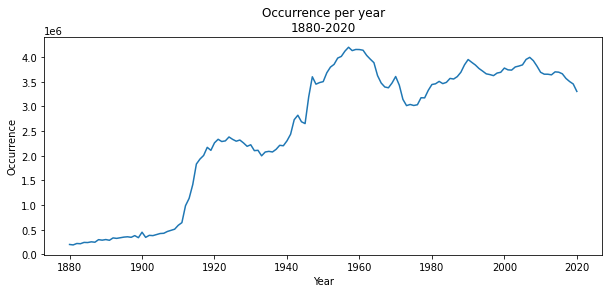

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

names_data = pd.read_csv('C:\\names\\names.csv')
print(f'Question 1: What is the total number of records in the dataset – how many children registered?'
      f' \nTotal number of registered children: {sum(names_data["Occurrence"])}')
pop_names = names_data.groupby('Gender').sum()
most = pop_names.loc['M', 'Occurrence'] - pop_names.loc['F', 'Occurrence']
print(f'Number of registration per gender:  female - {pop_names.loc["F", "Occurrence"]},'
      f' male - {pop_names.loc["M", "Occurrence"]}\nThere was {most} more male than female registered')
by_years = names_data.groupby(['Year']).sum()
fig = plt.figure(figsize=(10, 4))
by_years['Occurrence'].plot(ylabel='Occurrence', title='Occurrence per year\n1880-2020')
plt.show()

Question 2: What were 5 the most popular  female and 5 the most popular male names in data range from 1880 to 2020?


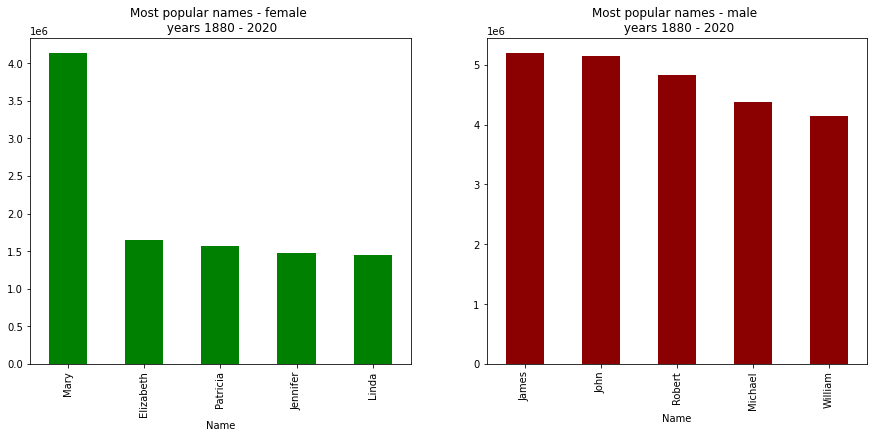

In [116]:
by_gen_f = names_data[names_data['Gender'] == 'F']
by_gen_m = names_data[names_data['Gender'] == 'M']
fem = by_gen_f.groupby("Name").sum()
mal = by_gen_m.groupby("Name").sum()
fem.sort_values('Occurrence', ascending=False, inplace=True)
mal.sort_values('Occurrence', ascending=False, inplace=True)
fig = plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
fem['Occurrence'].head().plot.bar(title='Most popular names - female \n years 1880 - 2020', color='green')
plt.subplot(1, 2, 2)
mal['Occurrence'].head().plot.bar(title='Most popular names - male \n years 1880 - 2020', color='darkred')
print('Question 2: What were 5 the most popular  female and 5 the most popular male names in data range '
      'from 1880 to 2020?')
plt.show()

Question 3: What were the most popular female names in 2020 and hundred years earlier?


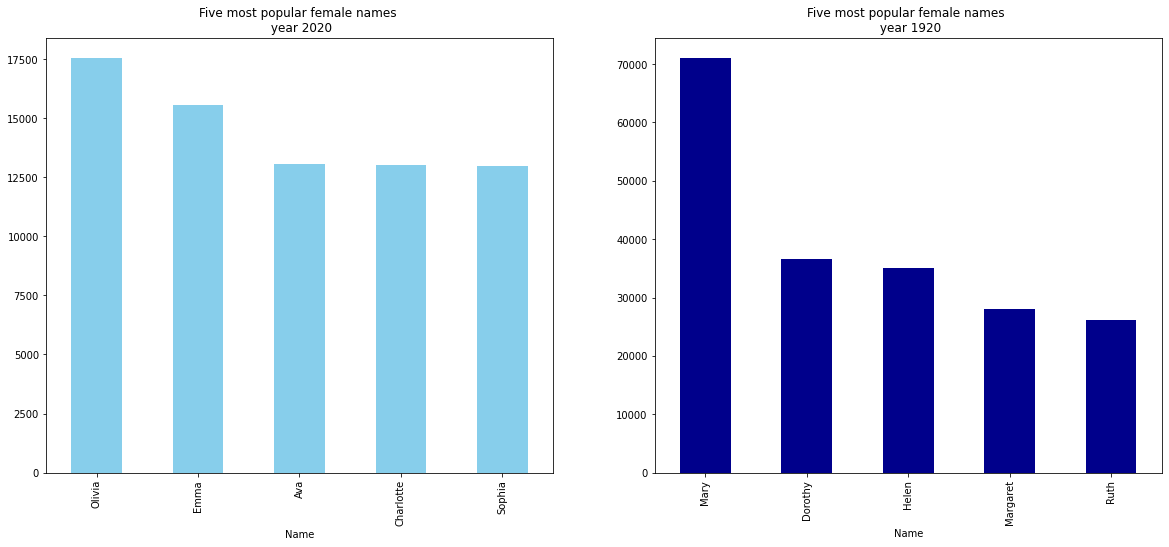

In [117]:
fig = plt.figure(figsize=(20, 8))
by_gen_new = by_gen_f[by_gen_f['Year'] == 2020]
by_gen_old = by_gen_f[by_gen_f['Year'] == 1920]
a = by_gen_new.groupby("Name").sum()
b = by_gen_old.groupby("Name").sum()
a.sort_values('Occurrence', ascending=False, inplace=True)
b.sort_values('Occurrence', ascending=False, inplace=True)
print('Question 3: What were the most popular female names in 2020 and hundred years earlier?')
plt.subplot(1, 2, 1)
a['Occurrence'].head().plot.bar(title='Five most popular female names \n year 2020', color='skyblue')
plt.subplot(1, 2, 2)
b['Occurrence'].head().plot.bar(title='Five most popular female names \n year 1920', color='darkblue')
plt.show()

Question 4: What was the total number of different names in United States from 1880 to 2020 by gender?
Total number of unique names in dataset is 100364.
There is 11108 names that are use for both genders.


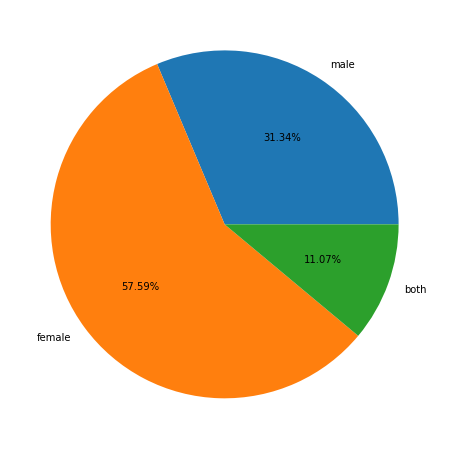

In [119]:
print('Question 4: What was the total number of different names in United States from 1880 to 2020 by gender?')
f_uniq = by_gen_f['Name'].unique()
m_uniq = by_gen_m['Name'].unique()
all_name = names_data['Name'].unique()
both_gen = len(f_uniq) + len(m_uniq) - len(all_name)
print(f'Total number of unique names in dataset is {len(all_name)}.\nThere is {both_gen} '
      f'names that are use for both genders.')
fig = plt.figure(figsize=(20, 8))
plt.pie([len(m_uniq)- both_gen, len(f_uniq)- both_gen, both_gen], labels=['male', 'female', 'both'], autopct='%.2f%%')
plt.show()

Question 5: What was the number of children registered per each year in data range 2011-2020 by gender?


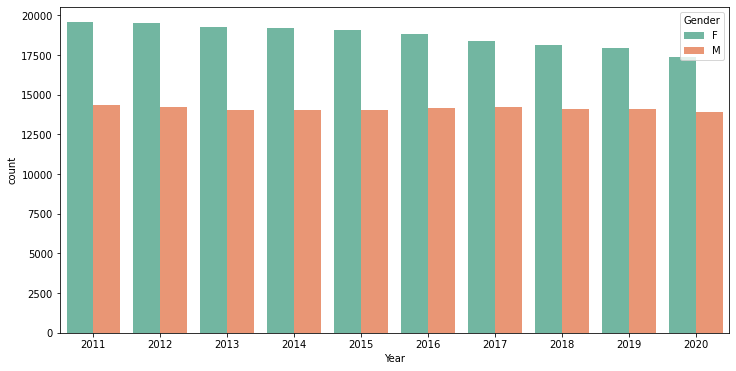

In [120]:
print('Question 5: What was the number of children registered per each year in data range 2011-2020 by gender?')
ten_years = names_data[names_data['Year'] >= 2011]
fig = plt.figure(figsize=(12, 6))
sns.countplot(x=ten_years['Year'], hue=ten_years['Gender'], data=ten_years, palette='Set2')
plt.show()
warnings.filterwarnings('ignore')